# Assignment #2 - Classification

<font color="red"> <b> Due: Feb 26 (Monday) 11:00 pm </b> </font>

<font color="blue"> Venkata Sai Santosh Ravi Teja Kancharla </font>

# I. Introduction

In this assignment we will implement four classification algorithms, Pocket algorithm, QDA, LDA and logistic regression on a train data set and predict the class label on a test data. We will implement the algorithms and test them on Breast Cancer data set and compare the results. The data set is initially divided into test and train data for convinience. The observations will be recorded. We also analyze the performance of the 4 models using some performance metrics.

# II. Data

We use a classification data set for implementing different classification models in this assignment. 

The following data set contains data related to breats cancer. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The data has a classifier result called outcome which has 2 values: M or B, Malignant or Bengin. The data is used to predict the breast cancer based on the features' data. The data set contains 569 rows of data. The attributes in the data set are

1) ID number
2) Diagnosis (M = malignant, B = benign)
3) 3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

For this assignment, I used the Radius1 and Texture1 values to train a model and predict on a test data. 

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [463]:
data = pd.read_csv("wdbc.data")
data

,ID,Outcome,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,concavity1,concaveP1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,concavity3,concaveP3,symmetry3,fractalDim3
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [464]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID              569 non-null int64
Outcome         569 non-null object
Radius1         569 non-null float64
Texture1        569 non-null float64
Perimeter1      569 non-null float64
Area1           569 non-null float64
Smoothness1     569 non-null float64
Compactness1    569 non-null float64
concavity1      569 non-null float64
concaveP1       569 non-null float64
symmetry1       569 non-null float64
fractalDim1     569 non-null float64
Radius2         569 non-null float64
Texture2        569 non-null float64
Perimeter2      569 non-null float64
Area2           569 non-null float64
Smoothness2     569 non-null float64
Compactness2    569 non-null float64
concavity2      569 non-null float64
concaveP2       569 non-null float64
symmetry2       569 non-null float64
fractalDim2     569 non-null float64
Radius3         569 non-null float64
Texture3        569 non-null float64
Perimeter3

The dataset is divided into two sets, Train data set and Test data set. The train data set is used to train a model and test set is used for testing the model and get predicted values. Here, M is given the value of -1 and B is given teh value of 1. 

In [484]:
XDdata = np.array(data.loc[:450,['Radius1', 'Texture1']])
TDdata = np.array(data.loc[:450,'Outcome'])
TDtrain = []
XDtrain = []
for i in range(0,451):
    if(TDdata[i] != 'M'):
        TDtrain.append(1)
        XDtrain.append(XDdata[i])
for i in range(0,451):
    if(TDdata[i] == 'M'):
        TDtrain.append(-1)
        XDtrain.append(XDdata[i])
XDtrain = np.array(XDtrain)
print(XDtrain)
TDtrain = np.array(TDtrain)
print(TDtrain)

[[ 13.54   14.36 ]
 [ 13.08   15.71 ]
 [  9.504  12.44 ]
 [ 13.03   18.42 ]
 [  8.196  16.84 ]
 [ 12.05   14.63 ]
 [ 13.49   22.3  ]
 [ 11.76   21.6  ]
 [ 13.64   16.34 ]
 [ 11.94   18.24 ]
 [ 11.52   18.75 ]
 [ 13.05   19.31 ]
 [  8.618  11.79 ]
 [ 10.17   14.88 ]
 [  8.598  20.98 ]
 [  9.173  13.86 ]
 [  9.465  21.01 ]
 [ 11.31   19.04 ]
 [  9.029  17.33 ]
 [ 12.78   16.49 ]
 [  8.888  14.64 ]
 [ 12.31   16.52 ]
 [ 13.53   10.94 ]
 [ 12.86   18.   ]
 [ 11.45   20.97 ]
 [ 13.34   15.86 ]
 [ 12.     15.65 ]
 [ 12.36   21.8  ]
 [ 14.64   15.24 ]
 [ 14.62   24.02 ]
 [ 13.27   14.76 ]
 [ 13.45   18.3  ]
 [ 12.18   17.84 ]
 [  9.787  19.94 ]
 [ 11.6    12.84 ]
 [  6.981  13.43 ]
 [ 12.18   20.52 ]
 [  9.876  19.4  ]
 [ 10.49   19.29 ]
 [ 11.64   18.33 ]
 [ 12.36   18.54 ]
 [ 11.34   21.26 ]
 [  9.777  16.99 ]
 [ 12.63   20.76 ]
 [ 14.26   19.65 ]
 [ 10.51   20.19 ]
 [  8.726  15.83 ]
 [ 11.93   21.53 ]
 [  8.95   15.76 ]
 [ 11.41   10.82 ]
 [ 14.5    10.89 ]
 [ 13.37   16.39 ]
 [ 13.85   1

Here the train data is plotted. We can observe that the Benign cases are at the lower parts of teh graph and Maignant cases are at the higher parts. There is a clear difference in their clusters, so we can predict a decision boundary based on this train data. 

266
184


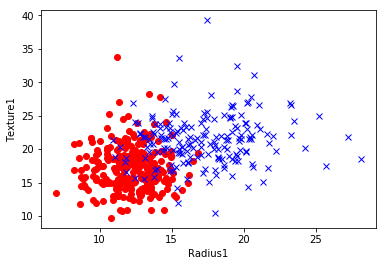

In [513]:
count =0
count1 =0
for i in range(0,450):
    if(TDtrain[i] == 1):
        plt.plot(XDtrain[i,0],XDtrain[i,1],'or')
        count = count +1
    else:
        plt.plot(XDtrain[i,0],XDtrain[i,1],'xb')
        count1 = count1 + 1
plt.xlabel('Radius1')
plt.ylabel('Texture1')
print(count)
print(count1)

Here, we are preparing the Test data set and then plotting the data. Here also we can observe a clear difference in the two clusters.

In [486]:
XDtest = np.array(data.loc[451:,['Radius1', 'Texture1',]])
TDdata1 = np.array(data.loc[451:,'Outcome'])
TDtest = []
for i in range(0,118):
    if(TDdata1[i] == 'M'):
        TDtest.append(-1)
    else:
        TDtest.append(1)
print(XDtest)
TDtest = np.array(TDtest)
TDtest


[[ 19.59   25.   ]
 [ 12.     28.23 ]
 [ 14.53   13.98 ]
 [ 12.62   17.15 ]
 [ 13.38   30.72 ]
 [ 11.63   29.29 ]
 [ 13.21   25.25 ]
 [ 13.     25.13 ]
 [  9.755  28.2  ]
 [ 17.08   27.15 ]
 [ 27.42   26.27 ]
 [ 14.4    26.99 ]
 [ 11.6    18.36 ]
 [ 13.17   18.22 ]
 [ 13.24   20.13 ]
 [ 13.14   20.74 ]
 [  9.668  18.1  ]
 [ 17.6    23.33 ]
 [ 11.62   18.18 ]
 [  9.667  18.49 ]
 [ 12.04   28.14 ]
 [ 14.92   14.93 ]
 [ 12.27   29.97 ]
 [ 10.88   15.62 ]
 [ 12.83   15.73 ]
 [ 14.2    20.53 ]
 [ 13.9    16.62 ]
 [ 11.49   14.59 ]
 [ 16.25   19.51 ]
 [ 12.16   18.03 ]
 [ 13.9    19.24 ]
 [ 13.47   14.06 ]
 [ 13.7    17.64 ]
 [ 15.73   11.28 ]
 [ 12.45   16.41 ]
 [ 14.64   16.85 ]
 [ 19.44   18.82 ]
 [ 11.68   16.17 ]
 [ 16.69   20.2  ]
 [ 12.25   22.44 ]
 [ 17.85   13.23 ]
 [ 18.01   20.56 ]
 [ 12.46   12.83 ]
 [ 13.16   20.54 ]
 [ 14.87   20.21 ]
 [ 12.65   18.17 ]
 [ 12.47   17.31 ]
 [ 18.49   17.52 ]
 [ 20.59   21.24 ]
 [ 15.04   16.74 ]
 [ 13.82   24.49 ]
 [ 12.54   16.32 ]
 [ 23.09   1

array([-1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1])

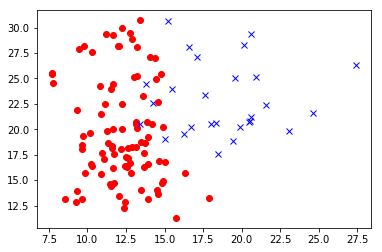

In [487]:
for i in range(0,118):
    if(TDtest[i] == 1):
        plt.plot(XDtest[i,0],XDtest[i,1],'or')
    else:
        plt.plot(XDtest[i,0],XDtest[i,1],'xb')

# III. Method

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description


### Pocket Algorithm

The linear model which we used for regression,

$$ Y = X w $$

can be used for classification. 

For this, simply we can discretize the output $Y$ for prediction, as the output can be discrete values.
Hence,the error function can be written 

$$
E = \frac{1}{N} \sum_{i=1}^{N} \mathbb{1} \Big[ sign(w^\top x_i) \ne t_i \Big] 
$$

This error function contains discrete functions such as $sign$ and the indicator delta function. 
Thus, the error function is not derivable, so we use perceptron or pocket algorithm to solve this. 

A perceptron is a supervised learning algorithm. It is a type of linear classifierthat applies a step function on the linear output. For classification, it iterate over the training examples, and update the weights in a way that would result in correct classification. In this model, when the data is not linearly separable, there is no guarantee on convergence. Thus, for training, we need to set the maximum number of iteration. Also, the algorithm selects an arbitrary hyperplane that divides two classes, so it is possible to discover a decision boundary that is not the best.

To overcome the unstability in the perceptron model, Pocket algorithm is introduced, in which the best solution so far is saved. Thus, we can have the best solution in out w array which we can use to get better results. 

### Discriminant analysis

It is a classification model used to find a combination of features that characterizes or separates two or more classes. We use the Baye's rules for determining the probability of occuranc of each classificaiton in teh given data. 
$$\quad P(T = k \mid X = x_i) \quad\text{for class label } k$$

There are two types of discriminant analysis, LDA(Linear discriminant analysis) and QDA(Quadratic discrminant analysis) 

#### QDA
A quadaratic surface is used to seperate classes in a data set. The discriminant function is defined as:

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

This function is quadratic, and results in a quadratic boundary for the classes. Hence this is called as Quadratric discriminant analysis. 

#### LDA

In LDA, the a linear combination of features in determined to seperate classes. This linear combination is used as teh linear classifier foe the classification. 

Maintaining a covariance matrix is not cheap. Hence, unlike QDA, here we use same covariance matrix for all the classes. The discriminant function is defined here as:

$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

It doesn't have any quadratic term, hence it is linear. 

### Logistic Regression

The binary logistic regression model is used to estimate the probability of a binary value based on one or more features. It measures the probability using a logistic function, which is the cumulative logistic distribution. Here the probability of  $P(T=k \mid x)$ is calculated and not of the class label k. It uses the same model for linear model, hence we can write:

$$
P(T=k \mid x) = h(X w) = h(\kappa) = y.
$$

A fucntion called the softmax function, which generalizes the logistic sigmoid function. 

### Implementation

A Super class, BaseModel is defined for the classification models. We take this super class, which contains abstract methods : *train()* , to train a data set and *use()* to test the data set on the predicted model, and create a child for it, called Classifier which is the base class for our classification models.

It has functions like, *add_ones()*, *check_matrix()* and *normalize()*. The normalize funciton is used to calculate the mean and standard deviation of X. We create a new class for each model and implement the model. Also we implement the model on some usage examples to test the accuracy of implementation 

### A. Super Classs Definition

In [12]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

In this class we will implement the pocket algorithm. A mothod called *compare()* is used to compare for better w values. It also has some variables, like maxiter(for maximum iteration), w_pocket and alpha. w_pocket stores teh best w value over the iterations. w_pocket is finally returned in th use function.

In [494]:
# Pocket Algorithm
from copy import deepcopy as copy 

class PocketAlgo(Classifier): 
    
    def __init__(self, alpha, maxiter):
        Classifier.__init__(self)
        self.alpha = alpha
        self.maxiter = maxiter
        self.w_pocket = None
        
    def compare(self, X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T):
        w = np.zeros(X.shape[1])
        self.w_pocket = copy(w)
        N = X.shape[0]
        for i in range(self.maxiter):
    
            converged = True
            for k in np.random.permutation(N):
                y = w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    w += self.alpha * T[k] * X[k]
                    converged = False
                    if self.compare(X, T, w, self.w_pocket) > 0: 
                        self.w_pocket[:] = w[:]

            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)
      
    
    # apply the learned model to data X
    def use(self, X):
        plt.plot(X@self.w_pocket)
        return self.w_pocket

#### Usage example for pocket algorithm

(-3, 7)

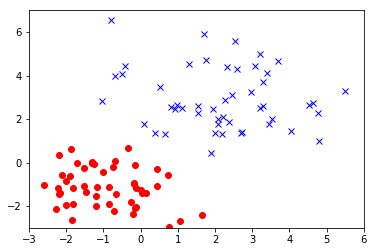

In [495]:
mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

C1 = np.random.multivariate_normal(mu1, cov1, 50)
C2 = np.random.multivariate_normal(mu2, cov2, 50)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])

(100,)
End of training:  999


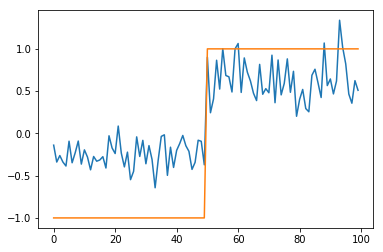

In [496]:
X = np.vstack((C1, C2))
N = X.shape[0]
T = np.ones(N)
T[:50] *= -1 
print(T.shape)
pa = PocketAlgo(0.1,1000)
pa.train(X,T)
y = pa.use(X)
plt.plot(T)
#plt.plot(y)

[ 1.2679526  -2.53590519]


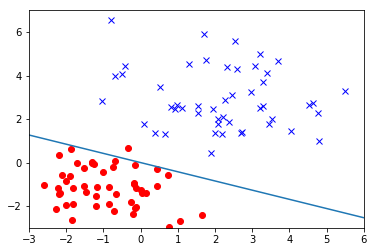

In [497]:
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

xt = np.array([-3, 6])
yt = -y[0] * xt / y[1]

plt.plot(xt, yt)
plt.xlim([-3, 6])
plt.ylim([-3, 7])
print(yt)

### C. QDA

The QDA class implements the QDA model. It has variables called: sigma1, sigma2, prior1, prior2, d1, d2, mu1, mu2. It takes the values, during creation, n1, n2 which denote the number of samples of each class in tha data. d1 and d2 give the final result. The decision boundary can be placed where d1 and d2 cross over. The *QDAf()* function calculates the QDF value for the given sigma, mu and prior. In the *train()*, the normalize function is called to obtain the mean and standard deviation of X.

In [380]:
## QDA 

class QDA(Classifier): 
    
    def __init__(self, n1, n2):
        Classifier.__init__(self)
        self.N1 = n1
        self.N2 = n2
        self.mu1 = None
        self.mu2 = None
        self.sigma1 = None
        self.sigma2 = None
        self.prior1 = None
        self.prior2 = None
        self.d1 = None
        self.d2 = None
        
    def QDAf(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(prior)
    
    def train(self, X, T):
        Xs = self.normalize(X)
        self.mu1 = np.mean(Xs[:self.N1], 0)
        self.mu2 = np.mean(Xs[self.N1:], 0)
        
        self.sigma1 = np.cov(Xs[:self.N1].T)
        self.sigma2 = np.cov(Xs[self.N1:].T)
        
        self.prior1 = self.N1 / (self.N1+self.N2)
        self.prior2 = self.N2 / (self.N1+self.N2)

        
    # apply the learned model to data X
    def use(self, X):
        Xs = self.normalize(X)
        self.d1 = self.QDAf(Xs, self.mu1, self.sigma1, self.prior1)
        self.d2 = self.QDAf(Xs, self.mu2, self.sigma2, self.prior2)
        return self.d1 - self.d2

#### Usage example for QDA

In [381]:
# Train and Test data
N1 = C1.shape[0]
N2 = C2.shape[0]
N = N1 + N2

Xtrain = np.vstack((C1, C2))
Ttrain = np.ones(80)
Ttrain[:N1] *= -1

q = QDA(N1, N2)
q.train(Xtrain, Ttrain)

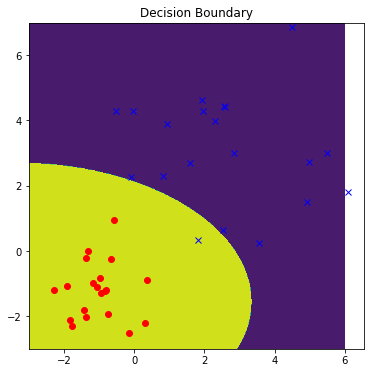

In [382]:
xs, ys = np.meshgrid(np.linspace(-3,6, 500), np.linspace(-3,7, 500))

Xtest = np.vstack((xs.flat, ys.flat)).T
d = q.use(Xtest)
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (q.d1 - q.d2 > 0).reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

### D. LDA

The LDA class implements the LDA model. It has variables called: sigma, prior1, prior2, d1, d2, mu1, mu2. It takes the values, during creation, n1, n2 which denote the number of samples of each class in tha data. d1 and d2 give the final result. The decision boundary can be placed where d1 and d2 cross over. The *LDAf()* function calculates the LDA value for the given sigma, mu and prior. In the *train()*, the normalize function is called to obtain the mean and standard deviation of X. It has only one sigma unlike QDA, which has sigma1 and sigma2. 

In [457]:
## QDA 

class LDA(Classifier): 
    
    def __init__(self, n1, n2):
        Classifier.__init__(self)
        self.N1 = n1
        self.N2 = n2
        self.mu1 = None
        self.mu2 = None
        self.sigma = None
        self.prior1 = None
        self.prior2 = None
        self.d1 = None
        self.d2 = None
        
    def LDAf(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                    - 0.5 * np.dot(mu, sigma_inv) * mu \
                    + np.log(prior), axis=1)
    
    def train(self, X, T):
        Xs = self.normalize(X)
        self.mu1 = np.mean(Xs[:self.N1], 0)
        self.mu2 = np.mean(Xs[self.N1:], 0)
        
        self.sigma = np.cov(Xs.T)
        
        self.prior1 = self.N1 / (self.N1+self.N2)
        self.prior2 = self.N2 / (self.N1+self.N2)

        
    # apply the learned model to data X
    def use(self, X):
        Xs = self.normalize(X)
        self.d1 = self.LDAf(Xs, self.mu1, self.sigma, self.prior1)
        self.d2 = self.LDAf(Xs, self.mu2, self.sigma, self.prior2)
        return self.d1 - self.d2

#### Usage example for LDA

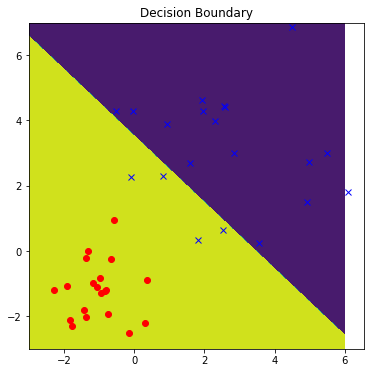

In [458]:
# Train and Test data
N1 = C1.shape[0]
N2 = C2.shape[0]
N = N1 + N2

Xtrain = np.vstack((C1, C2))
Ttrain = np.ones(80)
Ttrain[:N1] *= -1

l = LDA(N1, N2)
l.train(Xtrain, Ttrain)

xs, ys = np.meshgrid(np.linspace(-3,6, 500), np.linspace(-3,7, 500))

Xtest = np.vstack((xs.flat, ys.flat)).T
d = l.use(Xtest)
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (d > 0).reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

### E. Logistic Regression

This class implements Logistic regression. It has variables called aplha, niter, D, K and w, which will be used in teh softmax function. The softmax function is also defined here which take X as a parameter. Unlike the previous models, a column of ones(bias) is need to be added to the X axis, which is done in the *train()*. 

In [516]:
## Logistic regression


class LoR(Classifier): 
    
    def __init__(self, a, n, d, k):
        Classifier.__init__(self)
        self.alpha = a
        self.niter = n
        self.D = d
        self.K = k
        self.w = None
        
    def g(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
        
    def softmax(self, X):
        return self.g(X@self.w)
        

    def train(self, X, T):
        self.w = np.zeros(((self.D)+1, self.K))
        X1 = Classifier.add_ones(self,X)
        for step in range(self.niter):
            ys = self.softmax(X1)
            self.w += self.alpha * X1.T @ (T - ys)
        
    # apply the learned model to data X
    def use(self, X):
        X1 = Classifier.add_ones(self, X)
        return self.softmax(X1)


#### Usage example for logistic regression

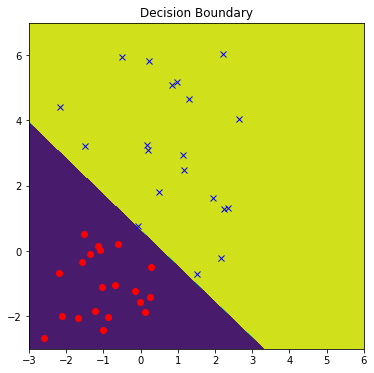

In [517]:
Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 2))
Ttrain[:50, 0] = 1
Ttrain[50:, 1] = 1

Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 2))
Ttest[:20, 0] = 1
Ttest[20:, 1] = 1

logReg= LoR(0.1,1000,2,2)
logReg.train(Xtrain, Ttrain)
y = logReg.use(Xtest)
y

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
#X1 = np.hstack((np.ones((X.shape[0], 1)), X))

Y = logReg.use(X)
zs = np.argmax(Y, 1)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

### Pocket Algorithm

Here, we create a object for PocketAlgo class. The object is called upon the train function, with XDtrain and TDtrain arrays, which are our training data set. Later, the model is used on the XDtest, which is our testing data and the results are plotted

End of training:  999


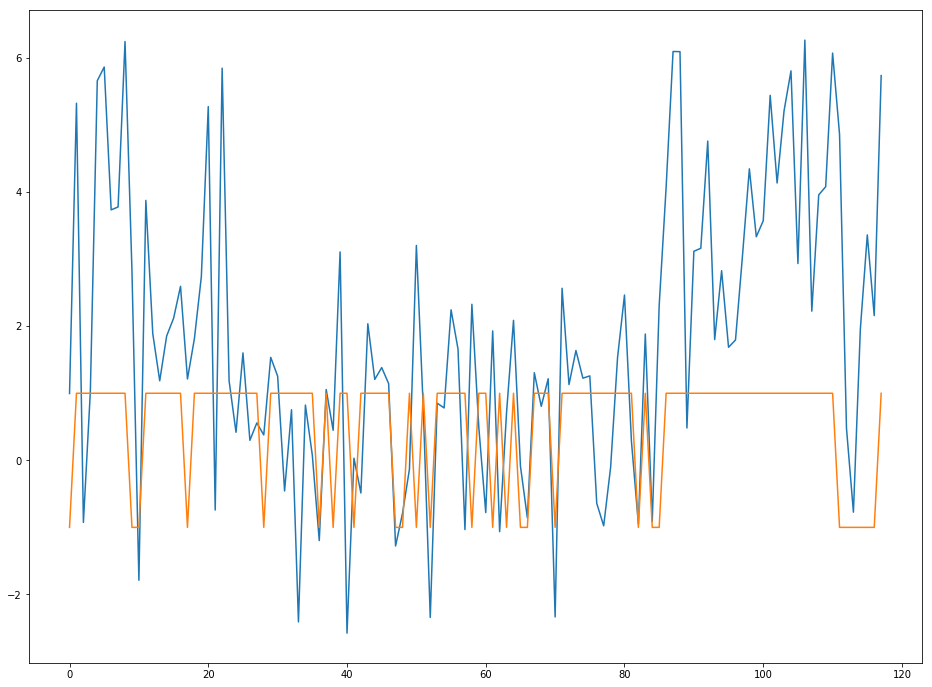

In [529]:
fig = plt.figure(figsize=(16,12))
pa = PocketAlgo(0.01,1000)
pa.train(XDtrain,TDtrain)
y = pa.use(XDtest)
plt.plot(TDtest)

We now plot our testing data with the class labels and also the decision border for the data.

[-0.41493  0.365  ]
[  5.6839726   34.10383562]


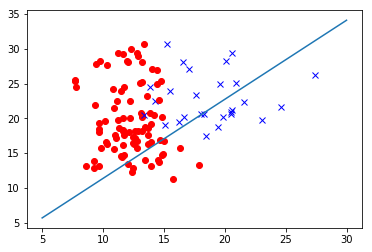

In [530]:
for i in range(0,118):
    if(TDtest[i] == 1):
        plt.plot(XDtest[i,0],XDtest[i,1],'or')
    else:
        plt.plot(XDtest[i,0],XDtest[i,1],'xb')

print(y)
xt = np.array([5, 30])
yt = -y[0] * xt / y[1]
plt.plot(xt,yt)
print(yt)


It can be observed that the model coudn't properly generate a decision boundary which can accurately predict whether the given radius and texture will result in B or M. Maybe, more number of features are needed to analyze properly using pocket algorithm.
Using only the radius and teaxture is not sufficient for getting good result in this case.

#### QDA

We now create an object for QDA class. Then, call upon the train function with the train data: XDtrain, TDtrain. We now use this model with XDtest data, by calling the use function. We get the difference of d1 and d2 into d. We can aslo access d1 and d2 using our created object. 

We create an array for the differences of d1 and d2, and try to predict the results from that. We know that the decision boundary for the classes is where d1 and d2 cross over, hence when d1-d2 is greater than 0, we expect to have Benign or B, and when it is not greater than 0, we are expected to have Malignin or M.

We compare our assumptions with the TDtest to find out the accuracy. We also implement our model on teh test data to check the test accuracy.

In [526]:

q = QDA(266, 184)
q.train(XDtrain, TDtrain)
d = q.use(XDtest)

t = np.array(q.d1 -q.d2 >0)
count= 0
for i in range(0,118):
    print(t[i], TDtest[i])
    if((t[i] == True) and (TDtest[i] == 1)):
        count+=1
    elif((t[i] == False) and (TDtest[i] == -1)):
        count+=1

print('Test accuracy: ', count)

d = q.use(XDtrain)
count1= 0
t = np.array(q.d1 -q.d2 >0)
for i in range(0,451):
    #print(t[i], TDtest[i])
    if((t[i] == True) and (TDtrain[i] == 1)):
        count1+=1
    elif((t[i] == False) and (TDtrain[i] == -1)):
        count1+=1

print('Train accuracy: ',count1)


False -1
False 1
True 1
True 1
False 1
False 1
False 1
True 1
True 1
False -1
False -1
False 1
True 1
True 1
True 1
True 1
True 1
False -1
True 1
True 1
False 1
True 1
False 1
True 1
True 1
True 1
True 1
True 1
False -1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
False -1
True 1
False -1
True 1
False 1
False -1
True 1
True 1
False 1
True 1
True 1
False -1
False -1
True 1
False -1
True 1
False -1
True 1
True 1
True 1
True 1
False 1
False -1
True 1
True 1
True -1
True 1
False -1
True 1
False -1
False -1
True 1
True 1
True 1
False -1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
False -1
True 1
False -1
False -1
True 1
True 1
True 1
True 1
False 1
False 1
False 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
False 1
True 1
False 1
True 1
True 1
True 1
False 1
True 1
False 1
False 1
False -1
False -1
False -1
False -1
False -1
False -1
True 1
Test accuracy:  99
Train accuracy:  404


We can observe that the QDA model predicted 99 out of the 118 entries accurately. This gives us 83% accuracy for this classification model. We can observe that QDA model performed better that Pocket algorithm, which couldn't properly differentiate the classes. The train accuracy is higher, as expected, being 89% for this model.

#### LDA

We now create an object for LDA class. Then, call upon the train function with the train data: XDtrain, TDtrain. We now use this model with XDtest data, by calling the use function. We get the difference of d1 and d2 into d. We can aslo access d1 and d2 using our created object. 

We create an array for the differences of d1 and d2, and try to predict the results from that. We know that the decision boundary for the classes is where d1 and d2 cross over, hence when d1-d2 is greater than 0, we expect to have Benign or B, and when it is not greater than 0, we are expected to have Malignin or M.

We compare our assumptions with the TDtest to find out the accuracy and see whether it performed better than QDA or not.

In [527]:

l = LDA(266, 184)
l.train(XDtrain, TDtrain)
ld = l.use(XDtest)

t = np.array(l.d1 -l.d2 >0)
count= 0
for i in range(0,118):
    print(t[i], TDtest[i])
    if((t[i] == True) and (TDtest[i] == 1)):
        count+=1
    elif((t[i] == False) and (TDtest[i] == -1)):
        count+=1

print('Train accuracy: ', count)

d = l.use(XDtrain)
count1= 0
t = np.array(l.d1 -l.d2 >0)
for i in range(0,451):
    #print(t[i], TDtest[i])
    if((t[i] == True) and (TDtrain[i] == 1)):
        count1+=1
    elif((t[i] == False) and (TDtrain[i] == -1)):
        count1+=1

print('Test accuracy: ',count1)

False -1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
False -1
False -1
True 1
True 1
True 1
True 1
True 1
True 1
False -1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True -1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
False -1
True 1
False -1
True 1
True 1
False -1
True 1
True 1
True 1
True 1
True 1
False -1
False -1
True 1
True -1
True 1
False -1
True 1
True 1
True 1
True 1
True 1
False -1
True 1
True 1
True -1
True 1
True -1
True 1
False -1
False -1
True 1
True 1
True 1
False -1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
False -1
True 1
False -1
True -1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
True 1
False -1
False -1
False -1
False -1
False -1
False -1
True 1
Train accuracy:  113
Test accuracy:  375


We can observe that the LDA model predicted 113 out of the 118 entries accurately. This gives us 95% accuracy for this classification model. This is better compared to the previous two models: QDA and pocket. We can say that LDA performed pretty well in predicting whether it is M or B based on radius and texture provided. However, teh train accuracy for the model is 83%, which is less than the test accuracy.

### Logistic regression

We now create a object for the class LogReg. We need to modify our data, as this class takes teh class labels as 0 and 1 unlike 1 and -1. We do the pre-processing and call the function on the test data. We now call the use() function upon our train data to get the results.  

In [518]:
TDtrain1 = []
XDtrain1 = []
for i in range(0,451):
    if(TDdata[i] != 'M'):
        TDtrain1.append([1,0])
        XDtrain1.append(XDdata[i])
for i in range(0,451):
    if(TDdata[i] == 'M'):
        TDtrain1.append([0,1])
        XDtrain1.append(XDdata[i])
XDtrain1 = np.array(XDtrain1)
TDtrain1 = np.array(TDtrain1)


logReg= LoR(0.01,1000,2,2)
logReg.train(XDtrain, TDtrain1)
y = logReg.use(XDtest)

print(y)


[[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]

C:\Users\kvssr\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
C:\Users\kvssr\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


The exp() encountered an overflow, maybe due to the increased size of it's parameter. Thus, I could'nt generate any results from this model.

### Comparision of Models

We already observed that pocket algorithm didn't work good for the data we provided for it. We try to compare the QDA, LDA models using some metrics. We first discuss some of these metrics like: Confusion matrix, area under ROC curve etc. 

In confusion matrix, we create a matrix with rows having positive and negative of the model and columns having positive and negative of the target data. For each target data value, we see whether the positive data is predicted as positive and the negative data is predicted as negative. We finally fill the matrix with our observed values and analyze the performance of the model using: sensitivity, specificity, accuracy, positive predictive value, negative predictive value. 

The overall metric which is important is teh accuracy of the model. For our QDA and LDA models, we already noted the observed results, but we ignored the false positive and true negative cases. We got 99 of the data samples predicted correctly, which gave us 83% accuracy.  LDA has 19 samples as false positives or true negatives.

In, LDA, we have 113 samples predicted correctly which gave us 95% accuracy. LDA has just 5 samples as false positives or true negatives.

The "area under ROC(Receiver operating characteristic) curve" metric is developed from the confusion matrix. The ROC curve is the plot between sensitivity and (1- specificity). (1- specificity) is also known as false positive rate and sensitivity is also known as True Positive rate. The area under the curve, having a value greater than 90 shows us that the model is excellent. 

# Conclusions

Summarize your work here. 
Which classifier do you think the best? 
Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

In this assignment, I implemented four classfication models, namely Pocket algorithm, QDA, LDA and Logistic regression. I then tested the accuracy of our implementation using some examples. The models are later applied upon the Breast Cancer data set, which we divided into test and train data sets. The results of pocket algorithm are plotted and The reamaining are analyzed using comparision of predicted value and actual value of the class. 

The assignment is quite challenging to work on. I mainly faced difficulty in plotting the results from the QDA and LDA models. However, I measured their accuracies based on their predicted value and actual value. I also struggled to implement Logistic regression upon my data set. I learned to implement these 4 models in object oriented model.

# References

    1) http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 - Dataset
    2) https://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/
    3) https://en.wikipedia.org/wiki/Discriminant_function_analysis
    4) "Hands-On Machine Learning with Scikit-Learn & TensorFlow" - Aurelien Geron
    5) Course material for the class ITCS 6156/8156

# Extra Credit

Search for a ordinal data set and apply your classifiers to it. 
Repeat the experiments on it. 
Do you have different observation from previous results? 
Were you able to observe that we discussed in class about logistic regression? 
For a full extra credit point, you need to discuss all bullet points in Results section.     

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)